# Global Insights: Country Clustering Analysis Using Unsupervised Machine Learning

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Data

The dataset used for this analysis is available on Kaggle and is titled "Unsupervised Learning on Country Data". The dataset contains information about various countries and includes the following columns:

- `country`: Name of the country
- `child_mort`: Child mortality rate (per 1000 live births)
- `exports`: Exports of goods and services (% of GDP)
- `health`: Total health spending (% of GDP)
- `imports`: Imports of goods and services (% of GDP)
- `income`: Net income per person
- `inflation`: The measurement of the annual growth rate of the Total GDP
- `life_expec`: Life expectancy at birth (in years)
- `total_fer`: The number of children that would be born to each woman if the current age-fertility rates remain the same
- `gdpp`: Gross Domestic Product per capita

The dataset can be accessed through the following link: [Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv).



In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [2]:
countries_data = pd.read_csv('../Data/Country-data.csv')
countries_data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [3]:
countries_data = countries_data.set_index('country')
countries_data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [4]:
Bangladesh_data = countries_data.loc['Bangladesh']
Bangladesh_data

child_mort      49.40
exports         16.00
health           3.52
imports         21.80
income        2440.00
inflation        7.14
life_expec      70.40
total_fer        2.33
gdpp           758.00
Name: Bangladesh, dtype: float64

#### Learing about the data

In [5]:
countries_data.shape

(167, 9)

In [6]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 17.1+ KB


In [7]:
countries_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

#### Data Cleaning

In [8]:
# num of missing value
countries_data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
def find_outliers(df, col, q1, q3):
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

def box_plot_all(df):
    for col in df.select_dtypes(exclude='object').columns:
        if col != 'Price':  # excluding price because it is our target
            sns.boxplot(data=df[col])

            # Calculate mean, Q1, and Q3
            mean_val = df[col].mean()
            q1 = np.percentile(df[col], 25)
            q3 = np.percentile(df[col], 75)
            
            # Plot mean, Q1, and Q3 levels
            plt.axhline(mean_val, color='r', linestyle='--', label='Mean')
            plt.axhline(q1, color='g', linestyle='--', label='Q1')
            plt.axhline(q3, color='b', linestyle='--', label='Q3')
            plt.title(f'Box Plot of {col}')
            plt.legend()
            plt.show()

            # Find and display percentage of outliers
            outliers = find_outliers(df, col, q1, q3)
            print('{} - % of outliers: {}%'.format(col, round(outliers.shape[0] / df.shape[0] * 100, 2)))
            print(outliers[col])



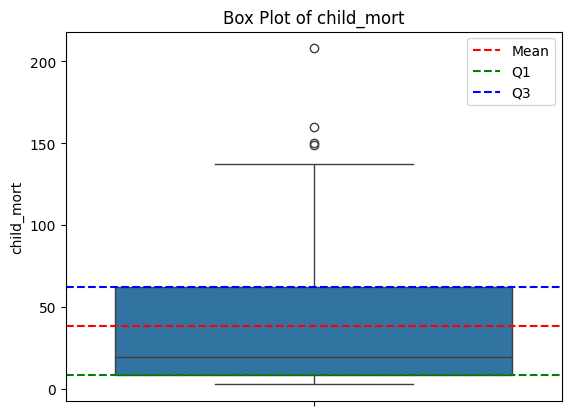

child_mort - % of outliers: 2.4%
country
Central African Republic    149.0
Chad                        150.0
Haiti                       208.0
Sierra Leone                160.0
Name: child_mort, dtype: float64


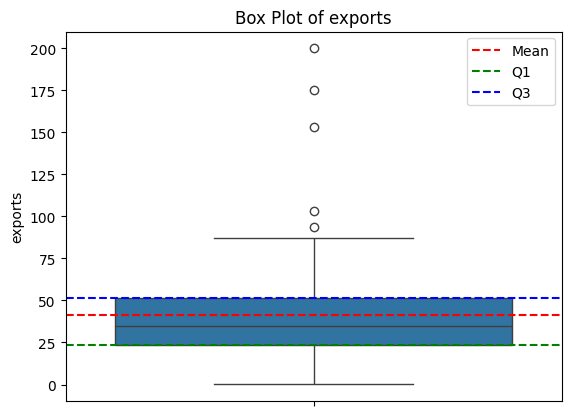

exports - % of outliers: 2.99%
country
Ireland       103.0
Luxembourg    175.0
Malta         153.0
Seychelles     93.8
Singapore     200.0
Name: exports, dtype: float64


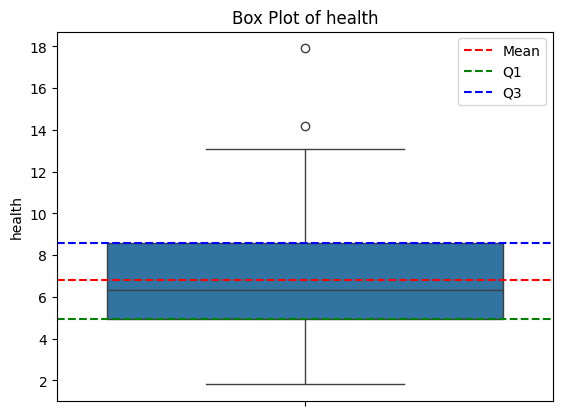

health - % of outliers: 1.2%
country
Micronesia, Fed. Sts.    14.2
United States            17.9
Name: health, dtype: float64


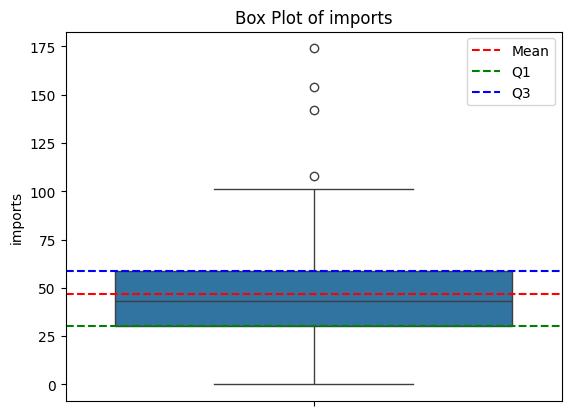

imports - % of outliers: 2.4%
country
Luxembourg    142.0
Malta         154.0
Seychelles    108.0
Singapore     174.0
Name: imports, dtype: float64


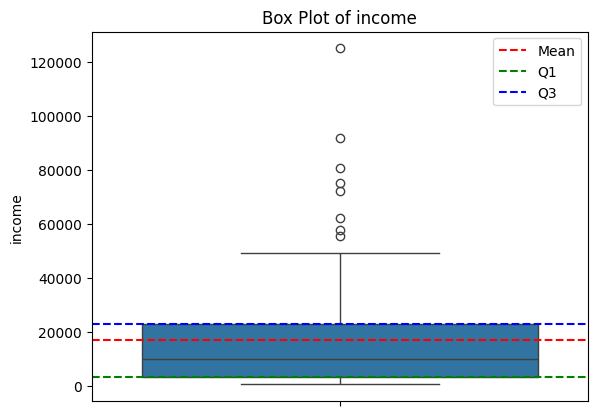

income - % of outliers: 4.79%
country
Brunei                   80600
Kuwait                   75200
Luxembourg               91700
Norway                   62300
Qatar                   125000
Singapore                72100
Switzerland              55500
United Arab Emirates     57600
Name: income, dtype: int64


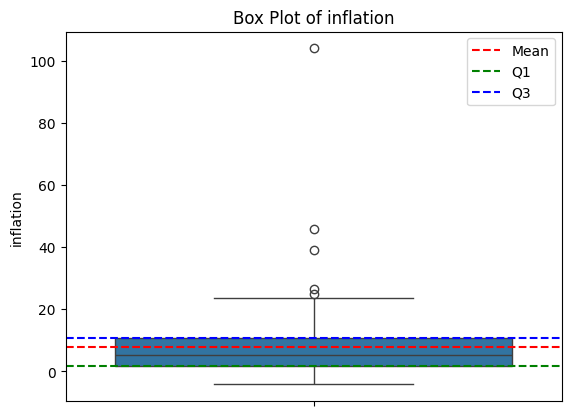

inflation - % of outliers: 2.99%
country
Equatorial Guinea     24.9
Mongolia              39.2
Nigeria              104.0
Timor-Leste           26.5
Venezuela             45.9
Name: inflation, dtype: float64


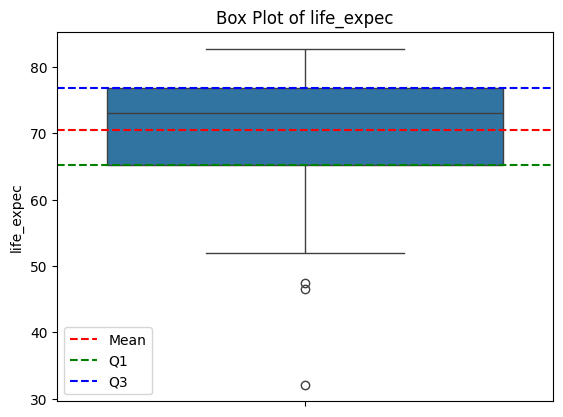

life_expec - % of outliers: 1.8%
country
Central African Republic    47.5
Haiti                       32.1
Lesotho                     46.5
Name: life_expec, dtype: float64


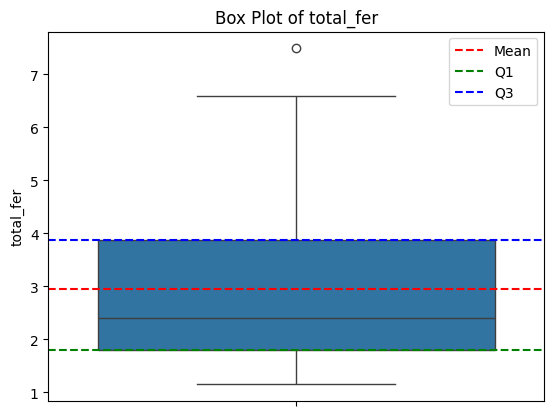

total_fer - % of outliers: 0.6%
country
Niger    7.49
Name: total_fer, dtype: float64


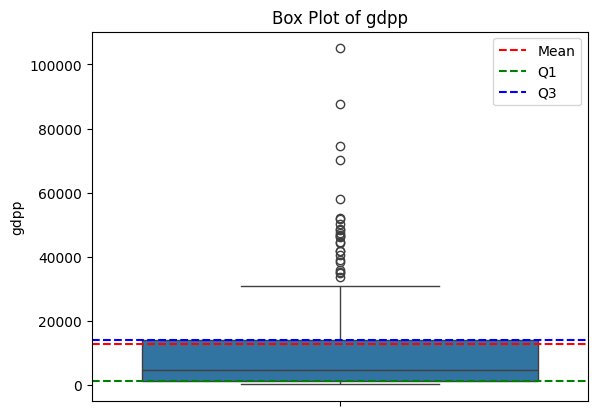

gdpp - % of outliers: 14.97%
country
Australia                51900
Austria                  46900
Belgium                  44400
Brunei                   35300
Canada                   47400
Denmark                  58000
Finland                  46200
France                   40600
Germany                  41800
Iceland                  41900
Ireland                  48700
Italy                    35800
Japan                    44500
Kuwait                   38500
Luxembourg              105000
Netherlands              50300
New Zealand              33700
Norway                   87800
Qatar                    70300
Singapore                46600
Sweden                   52100
Switzerland              74600
United Arab Emirates     35000
United Kingdom           38900
United States            48400
Name: gdpp, dtype: int64


In [10]:
box_plot_all(countries_data)

All data seems to be right, we do not need to fix any outlier

#### EDA


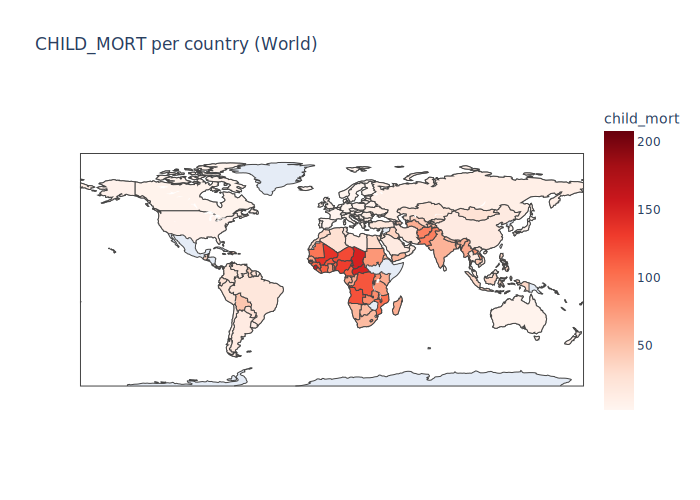

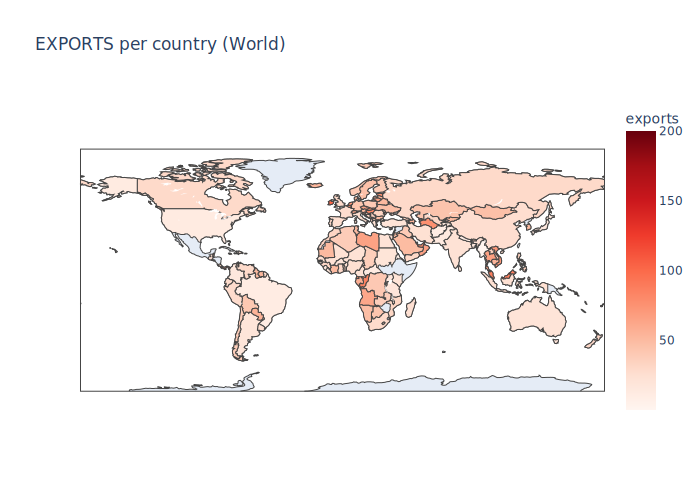

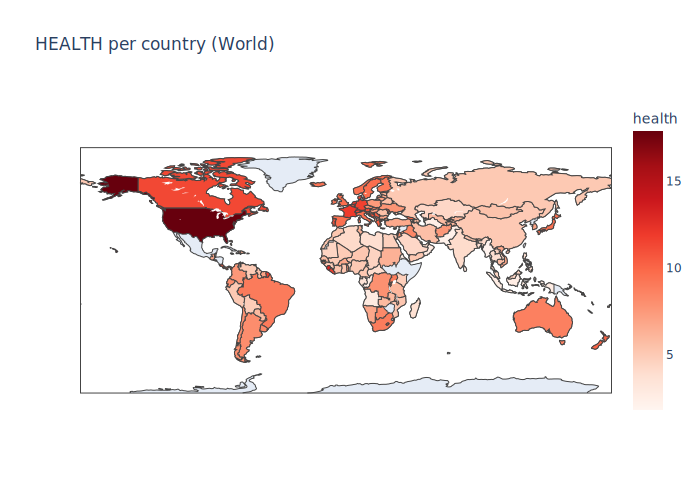

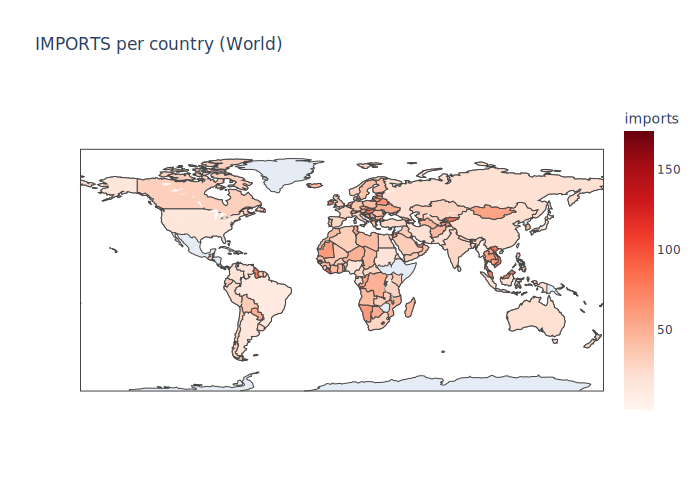

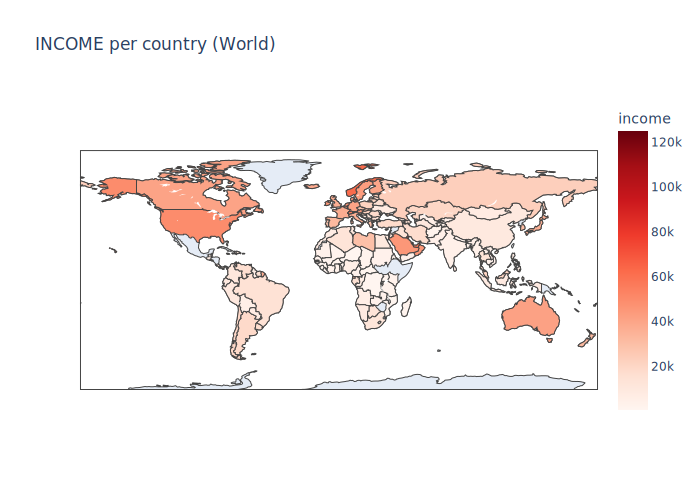

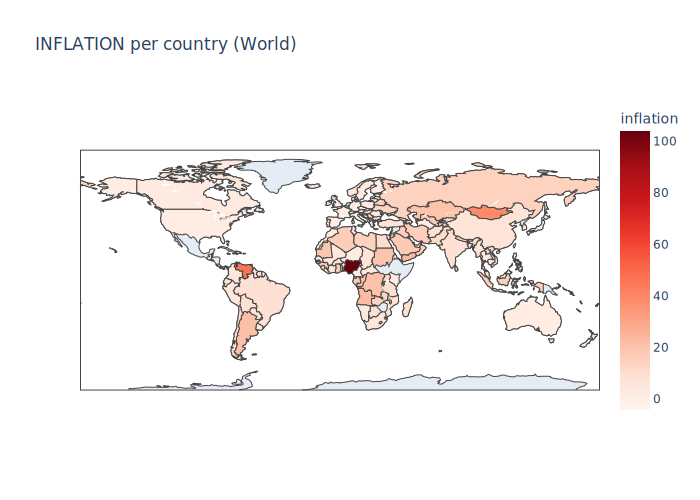

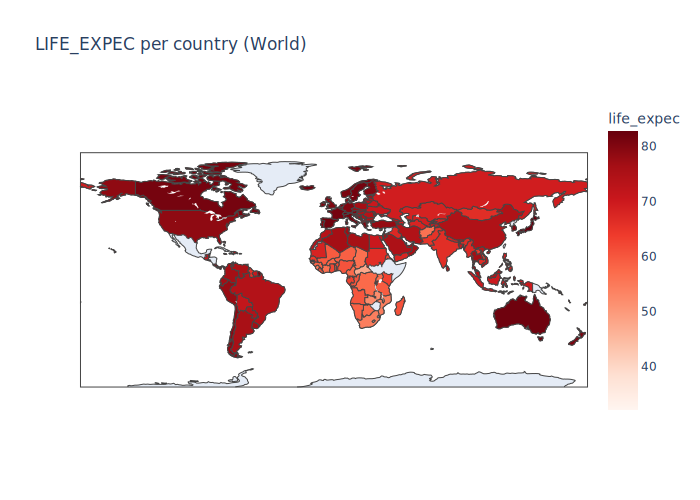

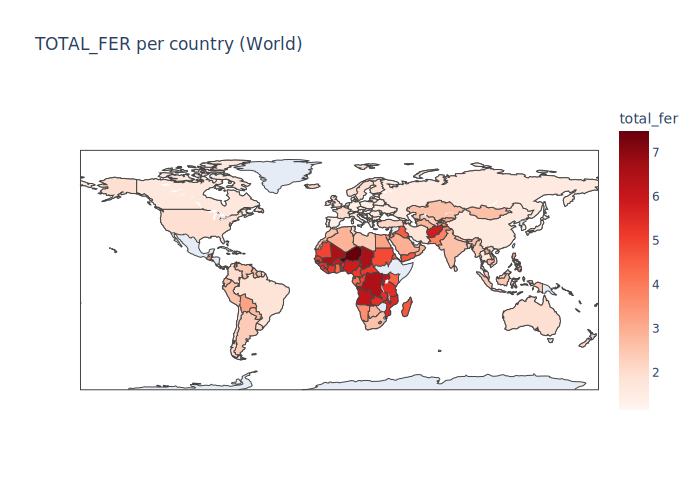

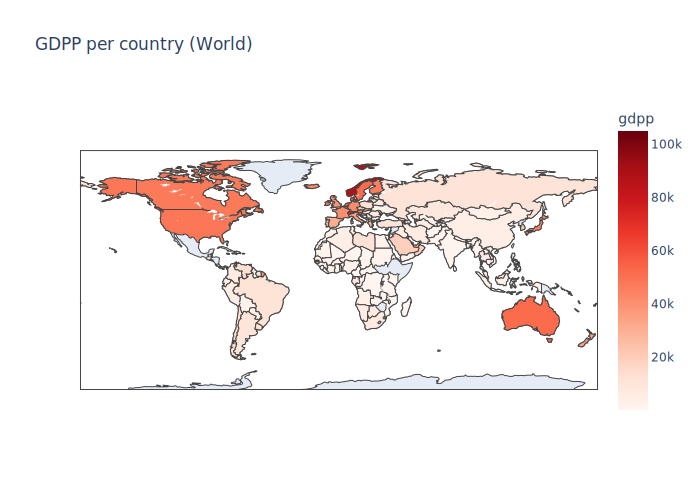

In [13]:
def create_choropleth_maps(df):
    for i in df.columns:
        fig = px.choropleth(df.reset_index(),  # Reset index to use country as a column
                            locationmode='country names',
                            locations='country',  # Assuming 'country' is the name of your index column
                            title=i.upper() + ' per country (World)',
                            color=i,
                            color_continuous_scale="Reds"
                        )
        fig.update_geos(fitbounds="locations", visible=True)
        fig.show(renderer="svg")
create_choropleth_maps(countries_data)